# References


1. https://www.kaggle.com/hocop1/centernet-baseline

2. https://www.kaggle.com/isakev/rb-s-centernet-baseline-pytorch-without-dropout

3. https://www.kaggle.com/mobassir/center-resnext50-baseline


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
'''a = []
while(1):
  a.append('1')'''

"a = []\nwhile(1):\n  a.append('1')"

In [0]:
!pip install timm
!pip install segmentation_models.pytorch
!pip install torchsummary
!pip install seaborn
!pip install -U git+https://github.com/albu/albumentations


     |████████████████████████████████| 122kB 3.0MB/s 
     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=237b5534955e9e729404f0945ea6f975854d08c91b031932485abfaf90b17cae
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.5.1-cp36-none-any.whl size=11768 sha256=1e92e54d0a95657ff56725d8383c1a9fc1e007acf9861040c14e11cf0fc5851e
  Stored in directory: /root/.cache/pip/wheels/52/0c/8e/58d91f29f0f8cbb45231a145312939a5423dc82c61cc731361
Successfully built pretrainedmodels efficientnet-pytorch
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-9bw7uejk
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-9bw7uejk
     |████████████████████████████████

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from tqdm import tqdm#_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import os
from scipy.optimize import minimize
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from torchvision import transforms, utils


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import os
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from tqdm.auto import tqdm as tq
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from torchvision import transforms, utils

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import sqrt, acos, pi, sin, cos
from scipy.spatial.transform import Rotation as R
from sklearn.metrics import average_precision_score
from multiprocessing import Pool

import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
import gc

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import sqrt, acos, pi, sin, cos
from scipy.spatial.transform import Rotation as R
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature
import matplotlib.pyplot as plt
from multiprocessing import Pool

from albumentations import Compose, ShiftScaleRotate, RandomCrop, BboxParams, \
    ToGray, CLAHE, GaussNoise, GaussianBlur, RandomGamma, \
    RandomBrightnessContrast, RGBShift, HueSaturationValue,Normalize
from albumentations import *

import segmentation_models_pytorch as smp



In [0]:


%%capture

# Uninstall and reinstall kaggle because I'm getting and error: the kaggle script
# is running on Python 2 instead of Python 3 and fails when downloading kernel
# outputs.
# It's also needed for download data for this competition.
!pip uninstall -y kaggle
!pip install kaggle

In [0]:
%%capture

# Install this library for reading the *.dcm images of this competition.
!pip install pydicom

In [0]:
%%capture

# Mount fuse-zip to mount zip files so we can access the files without unzip it.
# This is needed because of the lack of space in Google Colab disk.
!apt-get install -y fuse-zip

In [0]:
# Set environment variables for using the Kaggle API.
os.environ["KAGGLE_USERNAME"] = "your kaggle name"
os.environ["KAGGLE_KEY"] = "put your key"

In [0]:
!kaggle competitions download -c pku-autonomous-driving

100% 4.96G/4.96G [01:38<00:00, 154MB/s]
100% 4.96G/4.96G [01:38<00:00, 54.1MB/s]


In [0]:
#print(os.listdir('../tmp/pku-autonomous-driving.zip'))
!unzip /content/pku-autonomous-driving.zip -d pku-autonomous-driving
!unzip /content/pku-autonomous-driving/camera.zip -d pku-autonomous-driving/camera
!unzip /content/pku-autonomous-driving/car_models_json.zip -d pku-autonomous-driving/car_models_json
!unzip /content/pku-autonomous-driving/car_models.zip -d pku-autonomous-driving/car_models
!unzip /content/pku-autonomous-driving/test_images.zip -d pku-autonomous-driving/test_images
!unzip /content/pku-autonomous-driving/test_masks.zip -d pku-autonomous-driving/test_masks
!unzip /content/pku-autonomous-driving/train_images.zip -d pku-autonomous-driving/train_images
!unzip /content/pku-autonomous-driving/train_masks.zip -d pku-autonomous-driving/train_masks


Archive:  /content/pku-autonomous-driving.zip
  inflating: pku-autonomous-driving/camera/camera_intrinsic.txt  
  inflating: pku-autonomous-driving/car_models/019-SUV.pkl  
  inflating: pku-autonomous-driving/car_models/036-CAR01.pkl  
  inflating: pku-autonomous-driving/car_models/037-CAR02.pkl  
  inflating: pku-autonomous-driving/car_models/MG-GT-2015.pkl  
  inflating: pku-autonomous-driving/car_models/Skoda_Fabia-2011.pkl  
  inflating: pku-autonomous-driving/car_models/aodi-Q7-SUV.pkl  
  inflating: pku-autonomous-driving/car_models/aodi-a6.pkl  
  inflating: pku-autonomous-driving/car_models/baojun-310-2017.pkl  
  inflating: pku-autonomous-driving/car_models/baojun-510.pkl  
  inflating: pku-autonomous-driving/car_models/baoma-330.pkl  
  inflating: pku-autonomous-driving/car_models/baoma-530.pkl  
  inflating: pku-autonomous-driving/car_models/baoma-X5.pkl  
  inflating: pku-autonomous-driving/car_models/baoshijie-kayan.pkl  
  inflating: pku-autonomous-driving/car_models/baos

In [0]:
os.remove('pku-autonomous-driving.zip')

In [0]:
!ls '/content/pku-autonomous-driving/'

camera	    car_models_json	   test_images	train.csv     train_masks
car_models  sample_submission.csv  test_masks	train_images


In [0]:
PATH = '/content/pku-autonomous-driving/'

# Load data

In [0]:
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'sample_submission.csv')
bad_list = ['ID_1a5a10365',
'ID_1db0533c7',
'ID_53c3fe91a',
'ID_408f58e9f',
'ID_4445ae041',
'ID_bb1d991f6',
'ID_c44983aeb',
'ID_f30ebe4d4']
train = train.loc[~train['ImageId'].isin(bad_list)]
# From camera.zip
camera_matrix = np.array([[2304.5479, 0,  1686.2379],
                          [0, 2305.8757, 1354.9849],
                          [0, 0, 1]], dtype=np.float32)
camera_matrix_inv = np.linalg.inv(camera_matrix)

train.head()

,ImageId,PredictionString
0,ID_8a6e65317,16 0.254839 -2.57534 -3.10256 7.96539 3.20066 ...
1,ID_337ddc495,66 0.163988 0.192169 -3.12112 -3.17424 6.55331...
2,ID_a381bf4d0,43 0.162877 0.00519276 -3.02676 2.1876 3.53427...
3,ID_7c4a3e0aa,43 0.126957 -3.04442 -3.10883 -14.738 24.6389 ...
4,ID_8b510fad6,37 0.16017 0.00862796 -3.0887 -3.04548 3.4977 ...


**ImageId** column contains names of images:

In [0]:
DISTANCE_THRESH_CLEAR = 2

def convert_3d_to_2d(x, y, z, fx = 2304.5479, fy = 2305.8757, cx = 1686.2379, cy = 1354.9849):
    # stolen from https://www.kaggle.com/theshockwaverider/eda-visualization-baseline
    return x * fx / z + cx, y * fy / z + cy

def optimize_xy(r, c, x0, y0, z0, flipped=False):
    def distance_fn(xyz):
        x, y, z = xyz
        xx = -x if flipped else x
        slope_err = (xzy_slope.predict([[xx,z]])[0] - y)**2
        x, y = convert_3d_to_2d(x, y, z)
        y, x = x, y
        x = (x - IMG_SHAPE[0] // 2) * IMG_HEIGHT / (IMG_SHAPE[0] // 2) / MODEL_SCALE
        y = (y + IMG_SHAPE[1] // 6) * IMG_WIDTH / (IMG_SHAPE[1] * 4 / 3) / MODEL_SCALE
        return max(0.2, (x-r)**2 + (y-c)**2) + max(0.4, slope_err)
    
    res = minimize(distance_fn, [x0, y0, z0], method='Powell')
    x_new, y_new, z_new = res.x
    return x_new, y_new, z_new

def clear_duplicates(coords):
    for c1 in coords:
        xyz1 = np.array([c1['x'], c1['y'], c1['z']])
        for c2 in coords:
            xyz2 = np.array([c2['x'], c2['y'], c2['z']])
            distance = np.sqrt(((xyz1 - xyz2)**2).sum())
            if distance < DISTANCE_THRESH_CLEAR:
                if c1['confidence'] < c2['confidence']:
                    c1['confidence'] = -1
    return [c for c in coords if c['confidence'] > 0]

def extract_coords(prediction, flipped=False):
    logits = prediction[0]
    regr_output = prediction[1:]
    points = np.argwhere(logits > -0.5)
    col_names = sorted(['x', 'y', 'z', 'yaw', 'pitch_sin', 'pitch_cos', 'roll'])
    coords = []
    for r, c in points:
        regr_dict = dict(zip(col_names, regr_output[:, r, c]))
        coords.append(_regr_back(regr_dict))
        coords[-1]['confidence'] = 1 / (1 + np.exp(-logits[r, c]))
        coords[-1]['x'], coords[-1]['y'], coords[-1]['z'] = \
                optimize_xy(r, c,
                            coords[-1]['x'],
                            coords[-1]['y'],
                            coords[-1]['z'], flipped)
    coords = clear_duplicates(coords)
    return coords

def coords2str(coords, names=['yaw', 'pitch', 'roll', 'x', 'y', 'z', 'confidence']):
    s = []
    for c in coords:
        for n in names:
            s.append(str(c.get(n, 0)))
    return ' '.join(s)

In [0]:
def str2coords(s, names=['id', 'yaw', 'pitch', 'roll', 'x', 'y', 'z']):
    '''
    Input:
        s: PredictionString (e.g. from train dataframe)
        names: array of what to extract from the string
    Output:
        list of dicts with keys from `names`
    '''
    coords = []
    for l in np.array(s.split()).reshape([-1, 7]):
        coords.append(dict(zip(names, l.astype('float'))))
        if 'id' in coords[-1]:
            coords[-1]['id'] = int(coords[-1]['id'])
    return coords

In [0]:
def get_img_coords(s):
    '''
    Input is a PredictionString (e.g. from train dataframe)
    Output is two arrays:
        xs: x coordinates in the image (row)
        ys: y coordinates in the image (column)
    '''
    coords = str2coords(s)
    xs = [c['x'] for c in coords]
    ys = [c['y'] for c in coords]
    zs = [c['z'] for c in coords]
    P = np.array(list(zip(xs, ys, zs))).T
    img_p = np.dot(camera_matrix, P).T
    img_p[:, 0] /= img_p[:, 2]
    img_p[:, 1] /= img_p[:, 2]
    img_xs = img_p[:, 0]
    img_ys = img_p[:, 1]
    img_zs = img_p[:, 2] # z = Distance from the camera
    return img_xs, img_ys

'''plt.figure(figsize=(14,14))
plt.imshow(imread(PATH + 'train_images/' + train['ImageId'][2217] + '.jpg'))
plt.scatter(*get_img_coords(train['PredictionString'][2217]), color='red', s=100);'''

"plt.figure(figsize=(14,14))\nplt.imshow(imread(PATH + 'train_images/' + train['ImageId'][2217] + '.jpg'))\nplt.scatter(*get_img_coords(train['PredictionString'][2217]), color='red', s=100);"

In [0]:
img_orig_h, img_orig_w = 2710, 3384

def add_number_of_cars(df):
    """df - train or test"""
    df['numcars'] = [int((x.count(' ')+1)/7) for x in df['PredictionString']]
    return df

def remove_out_image_cars(df):

        def isnot_out(x,y):
            # are x,y coordinates within boundaries of the image
            return (x>=0)&(x<=img_orig_w)&(y>=0)&(y<=img_orig_h)

        df = add_number_of_cars(df)

        new_str_coords = []
        counter_all_ls = []
        for idx,str_coords in enumerate(df['PredictionString']):
            coords = str2coords(str_coords, names=['id', 'yaw', 'pitch', 'roll', 'x', 'y', 'z'])
            xs, ys = get_img_coords(str_coords)
            counter = 0
            coords_new = []
            
            for (item,x,y) in zip(coords, xs, ys):
                if isnot_out(x, y):
                    coords_new.append(item)
                    counter += 1
                                
            new_str_coords.append(coords2str(coords_new,  names=['id', 'yaw', 'pitch', 'roll', 'x', 'y', 'z']))
            counter_all_ls.append(counter)
            
        df['new_pred_string']  = new_str_coords 
        df['new_numcars'] = counter_all_ls

        print("num of cars outside image bounds:", df['numcars'].sum()-df['new_numcars'].sum(), 
            "out of all", df['numcars'].sum(), " cars in train")

        del df['PredictionString'], train['numcars']
        df.rename(columns={'new_pred_string': 'PredictionString'}, inplace=True)

        return df

In [0]:
train = remove_out_image_cars(train)
train.head(5)

num of cars outside image bounds: 997 out of all 49617  cars in train


,ImageId,PredictionString,new_numcars
0,ID_8a6e65317,16 0.254839 -2.57534 -3.10256 7.96539 3.20066 ...,5
1,ID_337ddc495,66 0.163988 0.192169 -3.12112 -3.17424 6.55331...,8
2,ID_a381bf4d0,43 0.162877 0.00519276 -3.02676 2.1876 3.53427...,25
3,ID_7c4a3e0aa,43 0.126957 -3.04442 -3.10883 -14.738 24.6389 ...,3
4,ID_8b510fad6,37 0.16017 0.00862796 -3.0887 -3.04548 3.4977 ...,19


In [0]:
def imread(path, fast_mode=False):
    img = cv2.imread(path)
    if not fast_mode and img is not None and len(img.shape) == 3:
        img = np.array(img[:, :, ::-1])
    return img

img = imread(PATH + 'train_images/ID_8a6e65317' + '.jpg')
IMG_SHAPE = img.shape


In [0]:
inp = train['PredictionString'][0]
print('Example input:\n', inp)
print()
print('Output:\n', str2coords(inp))

Example input:
 16 0.254839 -2.57534 -3.10256 7.96539 3.20066 11.0225 56 0.181647 -1.46947 -3.12159 9.60332 4.66632 19.339 70 0.163072 -1.56865 -3.11754 10.39 11.2219 59.7825 70 0.141942 -3.1395 3.11969 -9.59236 5.13662 24.7337 46 0.163068 -2.08578 -3.11754 9.83335 13.2689 72.9323

Output:
 [{'id': 16, 'yaw': 0.254839, 'pitch': -2.57534, 'roll': -3.10256, 'x': 7.96539, 'y': 3.20066, 'z': 11.0225}, {'id': 56, 'yaw': 0.181647, 'pitch': -1.46947, 'roll': -3.12159, 'x': 9.60332, 'y': 4.66632, 'z': 19.339}, {'id': 70, 'yaw': 0.163072, 'pitch': -1.56865, 'roll': -3.11754, 'x': 10.39, 'y': 11.2219, 'z': 59.7825}, {'id': 70, 'yaw': 0.141942, 'pitch': -3.1395, 'roll': 3.11969, 'x': -9.59236, 'y': 5.13662, 'z': 24.7337}, {'id': 46, 'yaw': 0.163068, 'pitch': -2.08578, 'roll': -3.11754, 'x': 9.83335, 'y': 13.2689, 'z': 72.9323}]


# Data distributions

DataFrame of all points

In [0]:
points_df = pd.DataFrame()
for col in ['x', 'y', 'z', 'yaw', 'pitch', 'roll']:
    arr = []
    for ps in train['PredictionString']:
        coords = str2coords(ps)
        arr += [c[col] for c in coords]
    points_df[col] = arr

print('len(points_df)', len(points_df))
points_df.head()

len(points_df) 48620


,x,y,z,yaw,pitch,roll
0,7.96539,3.20066,11.0225,0.254839,-2.57534,-3.10256
1,9.60332,4.66632,19.3390,0.181647,-1.46947,-3.12159
2,10.39000,11.22190,59.7825,0.163072,-1.56865,-3.11754
3,-9.59236,5.13662,24.7337,0.141942,-3.13950,3.11969
4,9.83335,13.26890,72.9323,0.163068,-2.08578,-3.11754


In [0]:
def rotate(x, angle):
    x = x + angle
    x = x - (x + np.pi) // (2 * np.pi) * 2 * np.pi
    return x


# 2D Visualization

In [0]:
xs, ys = [], []

for ps in train['PredictionString']:
    x, y = get_img_coords(ps)
    xs += list(x)
    ys += list(y)



# 3D Visualization
Used code from https://www.kaggle.com/zstusnoopy/visualize-the-location-and-3d-bounding-box-of-car, but made it one function

In [0]:
from math import sin, cos

# convert euler angle to rotation matrix
def euler_to_Rot(yaw, pitch, roll):
    Y = np.array([[cos(yaw), 0, sin(yaw)],
                  [0, 1, 0],
                  [-sin(yaw), 0, cos(yaw)]])
    P = np.array([[1, 0, 0],
                  [0, cos(pitch), -sin(pitch)],
                  [0, sin(pitch), cos(pitch)]])
    R = np.array([[cos(roll), -sin(roll), 0],
                  [sin(roll), cos(roll), 0],
                  [0, 0, 1]])
    return np.dot(Y, np.dot(P, R))

In [0]:
def draw_line(image, points):
    color = (255, 0, 0)
    cv2.line(image, tuple(points[0][:2]), tuple(points[3][:2]), color, 16)
    cv2.line(image, tuple(points[0][:2]), tuple(points[1][:2]), color, 16)
    cv2.line(image, tuple(points[1][:2]), tuple(points[2][:2]), color, 16)
    cv2.line(image, tuple(points[2][:2]), tuple(points[3][:2]), color, 16)
    return image


def draw_points(image, points):
    for (p_x, p_y, p_z) in points:
        cv2.circle(image, (p_x, p_y), int(1000 / p_z), (0, 255, 0), -1)
#         if p_x > image.shape[1] or p_y > image.shape[0]:
#             print('Point', p_x, p_y, 'is out of image with shape', image.shape)
    return image

In [0]:
def visualize(img, coords):
    # You will also need functions from the previous cells
    x_l = 1.02
    y_l = 0.80
    z_l = 2.31
    
    img = img.copy()
    for point in coords:
        # Get values
        x, y, z = point['x'], point['y'], point['z']
        yaw, pitch, roll = -point['pitch'], -point['yaw'], -point['roll']
        # Math
        Rt = np.eye(4)
        t = np.array([x, y, z])
        Rt[:3, 3] = t
        Rt[:3, :3] = euler_to_Rot(yaw, pitch, roll).T
        Rt = Rt[:3, :]
        P = np.array([[x_l, -y_l, -z_l, 1],
                      [x_l, -y_l, z_l, 1],
                      [-x_l, -y_l, z_l, 1],
                      [-x_l, -y_l, -z_l, 1],
                      [0, 0, 0, 1]]).T
        img_cor_points = np.dot(camera_matrix, np.dot(Rt, P))
        img_cor_points = img_cor_points.T
        img_cor_points[:, 0] /= img_cor_points[:, 2]
        img_cor_points[:, 1] /= img_cor_points[:, 2]
        img_cor_points = img_cor_points.astype(int)
        # Drawing
        img = draw_line(img, img_cor_points)
        img = draw_points(img, img_cor_points[-1:])
    
    return img

# Image preprocessing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def flip_hor_at_u(img, cx):
    # determine line for flipping rounded to 0.5 pixel
    cx_rounded = np.round(cx * 2).astype(np.int)
    u_flip = cx_rounded / 2

    # determine new width
    height, width, nchannels = img.shape
    if cx_rounded % 2 == 1:
        # if flipping line lies between two pixels...
        width_left = np.ceil(u_flip)
        width_right = np.floor(width - u_flip)
        width_new = 2 * max(width_left, width_right)
        pad_left = width_new / 2 - width_left
        pad_right = width_new / 2 - width_right
    else:
        # if flipping line lies at a pixel...
        width_left = np.round(u_flip)
        width_right = np.round(width - u_flip - 1)
        width_new = 2 * max(width_left, width_right) + 1
        pad_left = (width_new - 1) / 2 - width_left
        pad_right = (width_new - 1) / 2 - width_right

    # create new image and flip horizontally
    bg = img.mean(1, keepdims=True).astype(img.dtype)
    bg_left = np.repeat(bg, pad_left, axis=1)
    bg_right = np.repeat(bg, pad_right, axis=1)
    img_padded = np.hstack((bg_left, img, bg_right))
    img_padded_flipped = img_padded[:, ::-1, :]

    # crop back to org size s.t. cx=const
    dim_right = width_new-pad_right
    img_cropped = img_padded_flipped[:,
                  pad_left.astype(np.int):dim_right.astype(np.int)
                  :]
    width_cropped = img_cropped.shape[1]
    assert width_cropped== width, "width changed during flipping ?!"

    return img_cropped

In [0]:
IMG_WIDTH = 1500 #1536
IMG_HEIGHT = 512
MODEL_SCALE = 8

def _regr_preprocess(regr_dict, flip=False):
    if flip:
        for k in ['x', 'pitch', 'roll']:
            regr_dict[k] = -regr_dict[k]
    for name in ['x', 'y', 'z']:
        regr_dict[name] = regr_dict[name] / 100
    regr_dict['roll'] = rotate(regr_dict['roll'], np.pi)
    regr_dict['pitch_sin'] = sin(regr_dict['pitch'])
    regr_dict['pitch_cos'] = cos(regr_dict['pitch'])
    regr_dict.pop('pitch')
    regr_dict.pop('id')
    return regr_dict

def _regr_back(regr_dict):
    for name in ['x', 'y', 'z']:
        regr_dict[name] = regr_dict[name] * 100
    regr_dict['roll'] = rotate(regr_dict['roll'], -np.pi)
    
    pitch_sin = regr_dict['pitch_sin'] / np.sqrt(regr_dict['pitch_sin']**2 + regr_dict['pitch_cos']**2)
    pitch_cos = regr_dict['pitch_cos'] / np.sqrt(regr_dict['pitch_sin']**2 + regr_dict['pitch_cos']**2)
    regr_dict['pitch'] = np.arccos(pitch_cos) * np.sign(pitch_sin)
    return regr_dict

def preprocess_image(img, flip=False,path_img=False):
    img = img[img.shape[0] // 2:]
    bg = np.ones_like(img) * img.mean(1, keepdims=True).astype(img.dtype)
    bg = bg[:, :img.shape[1] // 6]
    img = np.concatenate([bg, img, bg], 1)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    if flip:
        #img = img[:,::-1]
        #cam_K = np.array([[2304.5479, 0, 1686.2379],[0, 2305.8757, 1354.9849],[0, 0, 1]], dtype=np.float32)
        #cx = cam_K[0, 2]
        #img = img[:,::-1]   #cv2.imread(path_img)[:,:,::-1] #BGR to RGB
        #img_flipped = flip_hor_at_u(img, cx)
        #img = img_flipped
        img = img[:,::-1] #this one need to be removed later

    #x = 2*(img - img.min()) / (img.max() - img.min()) - 1
    #return x.astype('float32')
    return (img / 255).astype('float32')

def get_mask_and_regr(img, labels, flip=False):
    mask = np.zeros([IMG_HEIGHT // MODEL_SCALE, IMG_WIDTH // MODEL_SCALE], dtype='float32')
    regr_names = ['x', 'y', 'z', 'yaw', 'pitch', 'roll']
    regr = np.zeros([IMG_HEIGHT // MODEL_SCALE, IMG_WIDTH // MODEL_SCALE, 7], dtype='float32')
    coords = str2coords(labels)
    xs, ys = get_img_coords(labels)
    for x, y, regr_dict in zip(xs, ys, coords):
        x, y = y, x
        x = (x - img.shape[0] // 2) * IMG_HEIGHT / (img.shape[0] // 2) / MODEL_SCALE
        x = np.round(x).astype('int')
        y = (y + img.shape[1] // 6) * IMG_WIDTH / (img.shape[1] * 4/3) / MODEL_SCALE
        y = np.round(y).astype('int')
        if x >= 0 and x < IMG_HEIGHT // MODEL_SCALE and y >= 0 and y < IMG_WIDTH // MODEL_SCALE:
            mask[x, y] = 1
            regr_dict = _regr_preprocess(regr_dict, flip)
            regr[x, y] = [regr_dict[n] for n in sorted(regr_dict)]
    if flip:
        mask = np.array(mask[:,::-1])
        regr = np.array(regr[:,::-1])
    return mask, regr

img.shape (512, 1500, 3) std: 0.2981316
mask.shape (64, 187) std: 0.020435417
regr.shape (64, 187, 7) std: 0.008641545


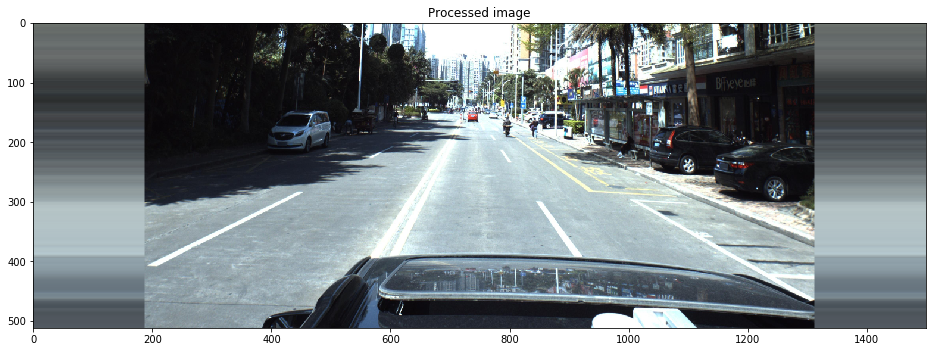

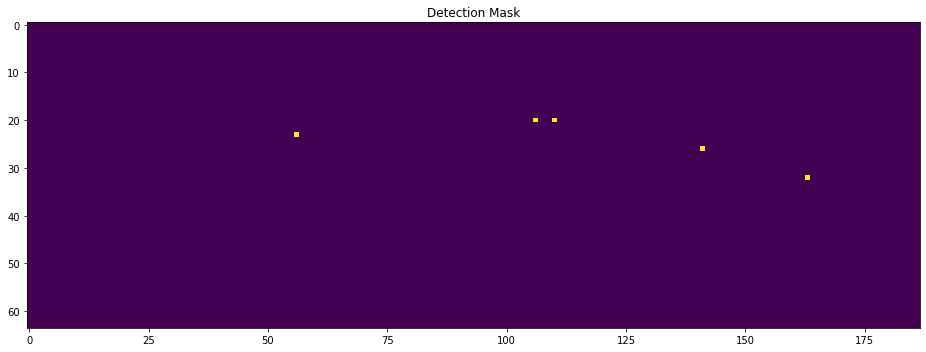

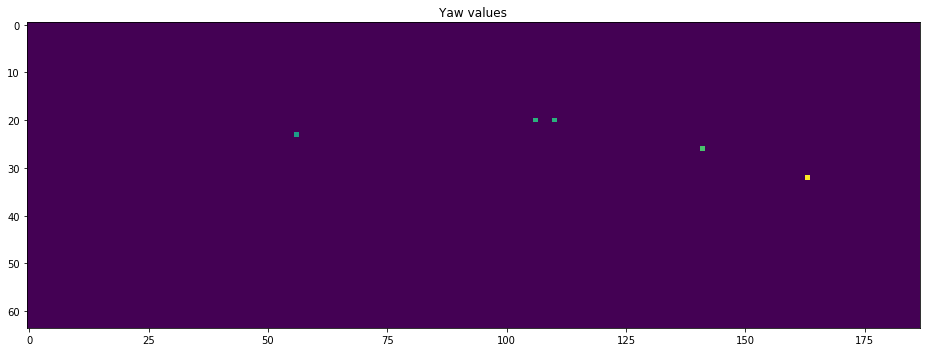

In [0]:
img0 = imread(PATH + 'train_images/' + train['ImageId'][0] + '.jpg')
img = preprocess_image(img0)

mask, regr = get_mask_and_regr(img0, train['PredictionString'][0])

print('img.shape', img.shape, 'std:', np.std(img))
print('mask.shape', mask.shape, 'std:', np.std(mask))
print('regr.shape', regr.shape, 'std:', np.std(regr))

plt.figure(figsize=(16,16))
plt.title('Processed image')
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Detection Mask')
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Yaw values')
plt.imshow(regr[:,:,-2])
plt.show()

In [0]:
zy_slope = LinearRegression()
X = points_df[['z']]
y = points_df['y']
zy_slope.fit(X, y)
print('MAE without x:', mean_absolute_error(y, zy_slope.predict(X)))

# Will use this model later
xzy_slope = LinearRegression()
X = points_df[['x', 'z']]
y = points_df['y']
xzy_slope.fit(X, y)
print('MAE with x:', mean_absolute_error(y, xzy_slope.predict(X)))

print('\ndy/dx = {:.3f}\ndy/dz = {:.3f}'.format(*xzy_slope.coef_))

MAE without x: 0.6580138572331508
MAE with x: 0.4511642419533298

dy/dx = 0.051
dy/dz = 0.169


# PyTorch Dataset

In [0]:
#for2048x512

means = np.array([80.302637, 73.818344, 69.698726]).reshape(1,1,3)
stds = np.array([52.455102, 52.848600, 50.285960]).reshape(1,1,3)
# for original image sizes:

#means = np.array([145.375023, 136.948063, 122.689194]).reshape(1,1,3)
#stds = np.array([95.254658, 94.717646, 85.960257]).reshape(1,1,3)

# for 1536x512 image sizes:

#means = np.array([159.07825724, 138.84992345, 108.55295054]).reshape(1,1,3)
#stds = np.array([97.08492574, 85.10409857, 63.48960234]).reshape(1,1,3)
def normalize(img, means, stds, tensor=False):
    return (img - means)/stds

def denormalize(img, means, stds, resize_to_original=False):  
    """ 
    input is numpy
    convert back to (0,255) and moveaxis from 3,x,x to x,x,3 after denormalizing - multiply by stds and add means
    img is a torch tensor"""

    img = np.moveaxis(img, 0, 2)
    img = img*stds + means
    img = np.clip(img, 0, 255).astype('uint8')

    if resize_to_original:
        # revert def preprocess_image()
        img = img[:,(img_w//4): (img_w - img_w//4),:]
        img = cv2.copyMakeBorder( img, img.shape[0], 0,0,0, cv2.BORDER_CONSTANT) #, borderType)
        img = cv2.resize(img, (img_orig_w, img_orig_h))
            
    return img




'''class CarDataset(Dataset):
    

    def __init__(self, dataframe, root_dir, training=True, transform=True):
        self.df = dataframe
        self.root_dir = root_dir
        self.transform = transform
        self.training = training
        if self.transform :
            if self.training :
                self.aug = Compose([
                    
                             #RandomGamma(p=0.2),
                            #A.ISONoise(),
                         
                            #A.GaussNoise()
                             #RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), 
                             #contrast_limit=(-0.3, 0.3),p=0.3),
                             #VerticalFlip(),
                             RandomGamma(p=0.2),
                             #HueSaturationValue(p=0.3), 
                             #RGBShift(p=0.3), 
                             #MotionBlur(p=0.1), 
                             #Blur(p=0.1), 
                             GaussNoise(var_limit=(20,100), p=0.2)
                             #ChannelShuffle(p=0.2)
                        
                            ])
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        # Get image name
        idx, labels = self.df.values[idx]
        img_name = self.root_dir.format(idx)
        
        # Read image
        img0 = imread(img_name, True)
        img = preprocess_image(img0)
        #img = normalize(img, means, stds)
        img -= img.mean()
        img /= img.std()
        img = np.rollaxis(img, 2, 0)
        # Get mask and regression maps
        if self.training:
            mask, regr = get_mask_and_regr(img0, labels)
            regr = np.rollaxis(regr, 2, 0)
        else:
            mask, regr = 0, 0
        if self.transform:
            augmented = self.aug(image=img, mask=mask,regr=regr)
            img, mask,regr = augmented['image'],augmented['mask'] ,augmented['regr']
            
        return [img, mask, regr]'''

class CarDataset(Dataset):
    """Car dataset."""

    def __init__(self, dataframe, root_dir, training=True, transform=None):
        self.df = dataframe
        self.root_dir = root_dir
        self.transform = transform
        self.training = training

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        # Get image name
        idx, labels = self.df.values[idx]
        img_name = self.root_dir.format(idx)
        
        # Augmentation
        flip = False
        if self.training:
            flip = np.random.randint(10) == 1
       
        
        # Read image
        img0 = imread(img_name, True)
        img = preprocess_image(img0, flip=flip,path_img = img_name)
        #img = normalize(img, means, stds)
        #imgmean = img.mean()
        #imgstd = img.std()
        #img = img - imgmean
        #img /= imgstd
        img = np.rollaxis(img, 2, 0)
        
        # Get mask and regression maps
        mask, regr = get_mask_and_regr(img0, labels, flip=flip)
        regr = np.rollaxis(regr, 2, 0)
        
        return [img, mask, regr]

In [0]:
train_images_dir = PATH + 'train_images/{}.jpg'
test_images_dir = PATH + 'test_images/{}.jpg'

#df_train, df_dev = train_test_split(train, test_size=0.1, random_state=42)
df_test = test



In [0]:
# Create dataset objects
from sklearn.model_selection import KFold 
num_splits = 10
fld = 5
kfold = KFold(n_splits=num_splits, shuffle=True, random_state= 1289)
trn_idx, val_idx = list(kfold.split(train))[fld]
train_dataset = CarDataset(train[['ImageId', 'PredictionString']].iloc[trn_idx], train_images_dir,
                           transform = False)
dev_dataset = CarDataset(train[['ImageId', 'PredictionString']].iloc[val_idx], train_images_dir,training = False,
                         transform = False)

test_dataset = CarDataset(df_test, test_images_dir, training=False,transform=False)

In [0]:
valid = train[['ImageId', 'PredictionString']].iloc[val_idx]
valid

,ImageId,PredictionString
14,ID_61e1898df,76 0.186786 -0.00485536 -3.05507 -22.6649 5.21...
18,ID_63ed0ec41,37 0.142653 -3.10794 -3.10915 -14.1563 5.70828...
28,ID_34121bb7d,28 0.170231 -0.0269025 -3.09406 -22.812 6.2309...
37,ID_9bd2e72b9,28 0.124149 0.0109254 -3.14029 3.31002 4.56886...
44,ID_7739b8ae1,70 0.135409 0.000922195 -3.11599 -2.85222 3.57...
...,...,...
4232,ID_dc71fa02b,16 0.149978 -0.0297813 -3.01972 4.76896 3.3845...
4234,ID_308740c55,37 0.159314 -0.175345 -3.03575 7.40333 4.33153...
4245,ID_c6d204ae9,76 0.170054 0.00891005 3.12379 1.56865 4.15022...
4246,ID_c1edc9dea,31 0.109213 -3.11449 -3.12737 -10.7118 10.1896...


In [0]:
BATCH_SIZE = 2

# Create data generators - they will produce batches
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,drop_last=True)
dev_loader = DataLoader(dataset=dev_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2,drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [0]:
train_dataset

# PyTorch Model

In [0]:
!pip install efficientnet-pytorch

In [0]:
from efficientnet_pytorch import EfficientNet

In [0]:
'''class double_conv(nn.Module):
   
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.GroupNorm(16,out_ch),
            #FilterResponseNorm2d(16,out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.GroupNorm(16,out_ch),
            #FilterResponseNorm2d(16,out_ch),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        x = self.conv(x)
        return x

class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2=None):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        
        if x2 is not None:
            x = torch.cat([x2, x1], dim=1)
        else:
            x = x1
        x = self.conv(x)
        return x

def get_mesh(batch_size, shape_x, shape_y):
    mg_x, mg_y = np.meshgrid(np.linspace(0, 1, shape_y), np.linspace(0, 1, shape_x))
    mg_x = np.tile(mg_x[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mg_y = np.tile(mg_y[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mesh = torch.cat([torch.tensor(mg_x).to(device), torch.tensor(mg_y).to(device)], 1)
    return mesh'''

"class double_conv(nn.Module):\n   \n    def __init__(self, in_ch, out_ch):\n        super(double_conv, self).__init__()\n        self.conv = nn.Sequential(\n            nn.Conv2d(in_ch, out_ch, 3, padding=1),\n            nn.GroupNorm(16,out_ch),\n            #FilterResponseNorm2d(16,out_ch),\n            nn.ReLU(inplace=True),\n            nn.Conv2d(out_ch, out_ch, 3, padding=1),\n            nn.GroupNorm(16,out_ch),\n            #FilterResponseNorm2d(16,out_ch),\n            nn.ReLU(inplace=True)\n        )\n    def forward(self, x):\n        x = self.conv(x)\n        return x\n\nclass up(nn.Module):\n    def __init__(self, in_ch, out_ch, bilinear=True):\n        super(up, self).__init__()\n\n        #  would be a nice idea if the upsampling could be learned too,\n        #  but my machine do not have enough memory to handle all those weights\n        if bilinear:\n            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)\n        else:\n            self

In [0]:
'''class MyUNet(nn.Module):
    
    def __init__(self, n_classes):
        super(MyUNet, self).__init__()
        self.base_model = EfficientNet.from_pretrained('efficientnet-b2')
        
        self.conv0 = double_conv(5, 64)
        self.conv1 = double_conv(64, 128)
        self.conv2 = double_conv(128, 512)
        self.conv3 = double_conv(512, 1024)
        
        self.mp = nn.MaxPool2d(2)
        
        self.up1 = up(1410 + 1024, 512)
        self.up2 = up(512 + 512, 256)
        self.outc = nn.Conv2d(256, n_classes, 1)

        self.register_buffer('mean', torch.tensor([0.485, 0.456, 0.406]))
        self.register_buffer('std', torch.tensor([0.229, 0.224, 0.225]))

    def forward(self, x):
        
        x = (x - self.mean.view(3, 1, 1)) / self.std.view(3, 1, 1)
        batch_size = x.shape[0]
        mesh1 = get_mesh(batch_size, x.shape[2], x.shape[3])
        x0 = torch.cat([x, mesh1], 1)
        x1 = self.mp(self.conv0(x0))
        x2 = self.mp(self.conv1(x1))
        x3 = self.mp(self.conv2(x2))
        x4 = self.mp(self.conv3(x3))
        
        x_center = x[:, :, :, IMG_WIDTH // 8: -IMG_WIDTH // 8]
        feats = self.base_model.extract_features(x_center)
        bg = torch.zeros([feats.shape[0], feats.shape[1], feats.shape[2], feats.shape[3] // 8]).to(device)
        feats = torch.cat([bg, feats, bg], 3)
        
        # Add positional info
        mesh2 = get_mesh(batch_size, feats.shape[2], feats.shape[3])
        feats = torch.cat([feats, mesh2], 1)
        
        x = self.up1(feats, x4)
        x = self.up2(x, x3)
        x = self.outc(x)
        #x = x + 0.00000001
        return x'''

"class MyUNet(nn.Module):\n    \n    def __init__(self, n_classes):\n        super(MyUNet, self).__init__()\n        self.base_model = EfficientNet.from_pretrained('efficientnet-b2')\n        \n        self.conv0 = double_conv(5, 64)\n        self.conv1 = double_conv(64, 128)\n        self.conv2 = double_conv(128, 512)\n        self.conv3 = double_conv(512, 1024)\n        \n        self.mp = nn.MaxPool2d(2)\n        \n        self.up1 = up(1410 + 1024, 512)\n        self.up2 = up(512 + 512, 256)\n        self.outc = nn.Conv2d(256, n_classes, 1)\n\n        self.register_buffer('mean', torch.tensor([0.485, 0.456, 0.406]))\n        self.register_buffer('std', torch.tensor([0.229, 0.224, 0.225]))\n\n    def forward(self, x):\n        \n        x = (x - self.mean.view(3, 1, 1)) / self.std.view(3, 1, 1)\n        batch_size = x.shape[0]\n        mesh1 = get_mesh(batch_size, x.shape[2], x.shape[3])\n        x0 = torch.cat([x, mesh1], 1)\n        x1 = self.mp(self.conv0(x0))\n        x2 = self.

In [0]:
class double_conv(nn.Module):
   
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x

class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2=None):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        
        if x2 is not None:
            x = torch.cat([x2, x1], dim=1)
        else:
            x = x1
        x = self.conv(x)
        return x


class MyUNet1(nn.Module):
    
    def __init__(self, n_classes):
        super(MyUNet1, self).__init__()
        self.base_model = EfficientNet.from_pretrained('efficientnet-b0')
        
        self.conv0 = double_conv(3, 64)
        self.conv1 = double_conv(64, 128)
        self.conv2 = double_conv(128, 512)
        self.conv3 = double_conv(512, 1024)
        
        self.mp =  nn.MaxPool2d(2)
        
        self.up1 = up(1282 + 1024, 512)
        self.up2 = up(512 + 512, 256)
        self.outc = nn.Conv2d(256, n_classes, 1)

    def forward(self, x):
        x1 = self.mp(self.conv0(x))
        x2 = self.mp(self.conv1(x1))
        x3 = self.mp(self.conv2(x2))
        x4 = self.mp(self.conv3(x3))
        
        feats = self.base_model.extract_features(x)
        
        # Add positional info
        mg_x, mg_y = np.meshgrid(np.linspace(0, 1, int(feats.shape[3])), np.linspace(0, 1, int(feats.shape[2])))
        mg_x = np.tile(mg_x[None, None, :, :], [int(feats.shape[0]), 1, 1, 1]).astype('float32')
        mg_y = np.tile(mg_y[None, None, :, :], [int(feats.shape[0]), 1, 1, 1]).astype('float32')
        feats = torch.cat([feats, torch.tensor(mg_x).to(device), torch.tensor(mg_y).to(device)], 1)
        
        x = self.up1(feats, x4)
        x = self.up2(x, x3)
        x = self.outc(x)
        return x

In [0]:
import math
import torch
from torch.optim import Optimizer

# DeepMemory is designed to offset the weakness of many adaptive optimizers by creating a 'long term' memory of the gradients over the course of an epoch.
# This long term memory is averaged against the current adaptive step size generated from the current mini-batch in order to help guide the step size more optimally.

# DeepMemory also keeps a short term gradient buffer that was developed in diffgrad, and locks down the step size when minimal gradient change is detected.

# 1/1/2020 - @lessw2020 developed the long term memory concept as a blended average (vs max throttle in AdaMod), and created and tested deep Memory
# credits:
# DiffGrad:  Uses the local gradient friction clamp developed by DiffGrad, but with version 1 coded by lessw from the paper:
# https://github.com/shivram1987/diffGrad (S.R.Dubey et al)

# AdaMod - DeepMemory builds on the concepts for longer term monitoring in AdaMod (b3 concept but changed from min throttling to blended average and changed input to len_memory and size):

# AdaMod source and paper link - https://github.com/lancopku/AdaMod/blob/master/adamod/adamod.py

# modifications @lessw2020
# 1/1/20 = instead of b3, change to 'len_memory' and compute b3 (.99 is really 100 memory as 1-(1/100)= .99)


class DeepMemory(Optimizer):
    """Implements DeepMemory algorithm (built upon DiffGrad and AdaMod concepts) with Decoupled Weight Decay (arxiv.org/abs/1711.05101)
    
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        len_memory = b3 (smoothing coefficient from AdaMod) in easier to use format, mem average with b3 is averaged with immmediate gradient.  
            specify the memory len, b3 is computed.
        version = 0 means .5 clamping rate, 1 = 0-1 clamping rate (from DiffGrad)
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), len_memory=200, version=1,
                 eps=1e-6, weight_decay=1e-3, debug_print=False):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        #compute b3
        base = 1/len_memory
        beta3 = 1-(base)
        print(f"DeepMemory: length of memory is {len_memory} - this should be close or equal to batches per epoch")
        
        #debugging
        self.debug_print=debug_print
        
        
        if not 0.0 <= beta3 < 1.0:
            raise ValueError("Invalid len_memory parameter: {}".format(beta3))
        
        defaults = dict(lr=lr, betas=betas, beta3=beta3, eps=eps,
                        weight_decay=weight_decay)
        super().__init__(params, defaults)
        
        self.version = version

    def __setstate__(self, state):
        super().__setstate__(state)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError(
                        'DiffMod does not support sparse gradients')

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    # Exponential moving average of actual learning rates
                    state['exp_avg_lr'] = torch.zeros_like(p.data)
                    # Previous gradient
                    state['previous_grad'] = torch.zeros_like(p.data)                    
                    

                exp_avg, exp_avg_sq, exp_avg_lr = state['exp_avg'], state['exp_avg_sq'], state['exp_avg_lr']
                previous_grad = state['previous_grad']
                beta1, beta2 = group['betas']

                state['step'] += 1

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)

                denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1
                
                # compute diffgrad coefficient (dfc)
                if self.version==0:
                    diff = abs(previous_grad - grad)
                    
                elif self.version ==1:
                    diff = previous_grad-grad
               
                    
                if self.version==0 or self.version==1:    
                    dfc = 1. / (1. + torch.exp(-diff))
                
                    
                state['previous_grad'] = grad                

                if group['weight_decay'] != 0:
                    p.data.add_(-group['weight_decay'] * group['lr'], p.data)

                # create long term memory of actual learning rates (from AdaMod)
                step_size = torch.full_like(denom, step_size)
                step_size.div_(denom)
                exp_avg_lr.mul_(group['beta3']).add_(1 - group['beta3'], step_size)
                
                if self.debug_print:
                    print(f"batch step size {step_size} and exp_avg_step {exp_avg_lr}")
                    
                #Blend the mini-batch step size with long term memory
                step_size = step_size.add(exp_avg_lr)
                step_size = step_size.div(2.)
                    
                
                # update momentum with dfc
                exp_avg1 = exp_avg * dfc
                
                step_size.mul_(exp_avg1)

                p.data.add_(-step_size)

        return loss

In [0]:
effnet_ver = 'b0' #'b4'
dropout_rate = 0.15

class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            #nn.Dropout(0.15),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
            #nn.Dropout(0.1)
        )

    def forward(self, x):
        x = self.conv(x)
        return x

class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2=None):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))

        if x2 is not None:
            x = torch.cat([x2, x1], dim=1)
        else:
            x = x1
        x = self.conv(x)
        return x

def get_mesh(batch_size, shape_x, shape_y):
    mg_x, mg_y = np.meshgrid(np.linspace(0, 1, shape_y), np.linspace(0, 1, shape_x))
    mg_x = np.tile(mg_x[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mg_y = np.tile(mg_y[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mesh = torch.cat([torch.tensor(mg_x).to(device), torch.tensor(mg_y).to(device)], 1)
    return mesh


def set_dropout(model, drop_rate):
    # source: https://discuss.pytorch.org/t/how-to-increase-dropout-rate-during-training/58107/4
    for name, child in model.named_children():
        if isinstance(child, torch.nn.Dropout):
            child.p = drop_rate
            print("name:", name)
            print("children:\n", child)


def effnet_dropout(drop_rate):
    base_model0 = EfficientNet.from_pretrained(f"efficientnet-{effnet_ver}")
    set_dropout(base_model0, drop_rate)
    return base_model0


class MyUNet(nn.Module):
    '''Mixture of previous classes'''
    def __init__(self, n_classes, drop_rate):
        super(MyUNet, self).__init__()
        
        self.drop_rate = dropout_rate
        self.base_model = effnet_dropout(drop_rate = self.drop_rate)
        self.conv0 = double_conv(5, 64)
        self.conv1 = double_conv(64, 128)
        self.conv2 = double_conv(128, 512)
        #self.conv22 = double_conv(512, 512)
        self.conv3 = double_conv(512, 1024)
        
        self.mp = nn.MaxPool2d(2)
        
        if effnet_ver == 'b0': self.up1 = up(1282 + 1024, 512)
        elif effnet_ver == 'b2': self.up1 = up(1410 + 1024, 512)
        elif effnet_ver == 'b3': self.up1 = up(1538 + 1024, 512)
        elif effnet_ver == 'b4': self.up1 = up(1794 + 1024, 512)
        elif effnet_ver == 'b5': self.up1 = up(2050 + 1024, 512)

        '''means = np.array([80.302637, 73.818344, 69.698726]).reshape(1,1,3)
         stds = np.array([52.455102, 52.848600, 50.285960]).reshape(1,1,3)'''
        
        self.up2 = up(512 + 512, 256)
        self.outc = nn.Conv2d(256, n_classes, 1)
        #self.register_buffer('mean', torch.tensor([80.302637, 73.818344, 69.698726]))
        #self.register_buffer('std', torch.tensor([52.455102, 52.848600, 50.285960]))

    def forward(self, x):
        #x = (x - self.mean.view(3, 1, 1)) / self.std.view(3, 1, 1)
        batch_size = x.shape[0]
        mesh1 = get_mesh(batch_size, x.shape[2], x.shape[3])
        x0 = torch.cat([x, mesh1], 1)
        
        #import pdb; pdb.set_trace()
        
        x1 = self.mp(self.conv0(x0))
        x2 = self.mp(self.conv1(x1))
        x3 = self.mp(self.conv2(x2))
        #x3 = self.mp(self.conv22(x3))
        x4 = self.mp(self.conv3(x3))
        
        feats = self.base_model.extract_features(x)
        
        # Add positional info
        mesh2 = get_mesh(batch_size, feats.shape[2], feats.shape[3])
        feats = torch.cat([feats, mesh2], 1)
        
        x = self.up1(feats, x4)
        x = self.up2(x, x3)
        x = self.outc(x)
        return x


def build_model(drop_rate):
    # Gets the GPU if there is one, otherwise the cpu
    print("device:", device)
    model = MyUNet(8, drop_rate).to(device)
    #set_dropout(model, drop_rate=drop_rate)    
    return model

In [0]:
# Gets the GPU if there is one, otherwise the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 30

#model = MyUNet(8).to(device)
model = build_model(drop_rate=dropout_rate)
#model = CentResnet(8).to(device)
memory_size = len(train_loader) // 2
optimizer = DeepMemory(model.parameters(),   len_memory = memory_size)
num_steps = len(train_loader) * n_epochs
#exp_lr_scheduler = OneCycle(nb = num_steps,max_lr = 1e-35,div = 8)
exp_lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer,base_lr=0.001,cycle_momentum=False,max_lr=0.0045,step_size_up=num_steps)

cuda
device: cuda
Loaded pretrained weights for efficientnet-b0
name: _dropout
children:
 Dropout(p=0.15, inplace=False)


RuntimeError: ignored

In [0]:
effnet = model

effnet.load_state_dict(torch.load(f'/content/drive/My Drive/effb0/normclip_b0validloss_0.5875084400177002_mask_0.3697986900806427_regr_0.21770983934402466_epoch_7.pth'))

In [0]:
# Gets the GPU if there is one, otherwise the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 30

model = MyUNet1(8).to(device)
#model = build_model(drop_rate=dropout_rate)
#model = CentResnet(8).to(device)
memory_size = len(train_loader) // 2
optimizer = DeepMemory(model.parameters(),   len_memory = memory_size)
num_steps = len(train_loader) * n_epochs
#exp_lr_scheduler = OneCycle(nb = num_steps,max_lr = 1e-35,div = 8)
exp_lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer,base_lr=0.001,cycle_momentum=False,max_lr=0.0045,step_size_up=num_steps)

effnet0 = model

effnet0.load_state_dict(torch.load(f'/content/drive/My Drive/effnetb0/b0validloss_1.0845099687576294epoch_13.pth'))

In [0]:
# https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)  #herre

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    '''def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)'''

    def forward(self, x):
        conv1 = F.relu(self.bn1(self.conv1(x)), inplace=True)
        conv1 = F.max_pool2d(conv1, 3, stride=2, padding=1)

        feats4 = self.layer1(conv1)
        feats8 = self.layer2(feats4)
        feats16 = self.layer3(feats8)
        feats32 = self.layer4(feats16)

        return feats8, feats16, feats32

def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet18(pretrained=False, progress=True, **kwargs):
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)


def resnet34(pretrained=False, progress=True, **kwargs):
    r"""ResNet-34 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet34', BasicBlock, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet50(pretrained=False, progress=True, **kwargs):
    r"""ResNet-50 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet50', Bottleneck, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet101(pretrained=False, progress=True, **kwargs):
    r"""ResNet-101 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet101', Bottleneck, [3, 4, 23, 3], pretrained, progress,
                   **kwargs)


def resnet152(pretrained=False, progress=True, **kwargs):
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)


def resnext50_32x4d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-50 32x4d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 4
    return _resnet('resnext50_32x4d', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def resnext101_32x8d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-101 32x8d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 8
    return _resnet('resnext101_32x8d', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)


def wide_resnet50_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-50-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet50_2', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def wide_resnet101_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-101-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet101_2', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)

In [0]:
from torch.hub import load_state_dict_from_url
base_model = resnext50_32x4d(pretrained=True)
#base_model

In [0]:
class CentResnet(nn.Module):
    '''Mixture of previous classes'''
    def __init__(self, n_classes):
        super(CentResnet, self).__init__()
        self.base_model = base_model
        
        # Lateral layers convert resnet outputs to a common feature size
        self.lat8 = nn.Conv2d(512, 256, 1)
        self.lat16 = nn.Conv2d(1024, 256, 1)
        self.lat32 = nn.Conv2d(2048, 256, 1)
        self.bn8 = nn.GroupNorm(16, 256)
        self.bn16 = nn.GroupNorm(16, 256)
        self.bn32 = nn.GroupNorm(16, 256)

       
        self.conv0 = double_conv(5, 64)
        self.conv1 = double_conv(64, 128)
        self.conv2 = double_conv(128, 512)
        self.conv3 = double_conv(512, 1024)
        
        self.mp = nn.MaxPool2d(2)
        
        self.up1 = up(1282 , 512) #+ 1024
        self.up2 = up(512 + 512, 256)
        self.outc = nn.Conv2d(256, n_classes, 1)
        #self.register_buffer('mean', torch.tensor([0.48085859, 0.53681498, 0.56985639]))
        #self.register_buffer('std', torch.tensor([0.3433558,  0.37425118, 0.37663064]))

    def forward(self, x):
        #x = (x - self.mean.view(3, 1, 1)) / self.std.view(3, 1, 1)
        batch_size = x.shape[0]
        mesh1 = get_mesh(batch_size, x.shape[2], x.shape[3])
        x0 = torch.cat([x, mesh1], 1)
        x1 = self.mp(self.conv0(x0))
        x2 = self.mp(self.conv1(x1))
        x3 = self.mp(self.conv2(x2))
        x4 = self.mp(self.conv3(x3))
        
        #feats = self.base_model.extract_features(x)
                # Run frontend network
        feats8, feats16, feats32 = self.base_model(x)
        lat8 = F.relu(self.bn8(self.lat8(feats8)))
        lat16 = F.relu(self.bn16(self.lat16(feats16)))
        lat32 = F.relu(self.bn32(self.lat32(feats32)))
        
        # Add positional info
        mesh2 = get_mesh(batch_size, lat32.shape[2], lat32.shape[3])
        feats = torch.cat([lat32, mesh2], 1)
        #print(feats.shape)
        #print (x4.shape)
        x = self.up1(feats, x4)
        x = self.up2(x, x3)
        x = self.outc(x)
        return x

In [0]:
import math
import torch
from torch.optim.optimizer import Optimizer
import numpy as np
import torch.nn as nn
#import torch.optim as Optimizer

# Original source:  https://github.com/shivram1987/diffGrad/blob/master/diffGrad.py

# modifications: @lessw2020


class DiffGrad(Optimizer):
    r"""Implements diffGrad algorithm. It is modified from the pytorch implementation of Adam.
    It has been proposed in `diffGrad: An Optimization Method for Convolutional Neural Networks`_.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        amsgrad (boolean, optional): whether to use the AMSGrad variant of this
            algorithm from the paper `On the Convergence of Adam and Beyond`_
            (default: False)
    .. _diffGrad: An Optimization Method for Convolutional Neural Networks:
        https://arxiv.org/abs/1909.11015
    .. _Adam\: A Method for Stochastic Optimization:
        https://arxiv.org/abs/1412.6980
    .. _On the Convergence of Adam and Beyond:
        https://openreview.net/forum?id=ryQu7f-RZ
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, version=0, weight_decay=0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        
        super().__init__(params, defaults)
        
        #save version
        self.version = version

    def __setstate__(self, state):
        super().__setstate__(state)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('diffGrad does not support sparse gradients, please consider SparseAdam instead')

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    # Previous gradient
                    state['previous_grad'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq, previous_grad = state['exp_avg'], state['exp_avg_sq'], state['previous_grad']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad.add_(group['weight_decay'], p.data)

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                # compute diffgrad coefficient (dfc)
                
                
                if self.version==0:
                    diff = abs(previous_grad - grad)
                elif self.version ==1:
                    diff = previous_grad-grad
                elif self.version ==2:
                    diff =  .5*abs(previous_grad - grad)
                    
                if self.version==0 or self.version==1:    
                    dfc = 1. / (1. + torch.exp(-diff))
                elif self.version==2:
                    dfc = 9. / (1. + torch.exp(-diff))-4      #DFC2 = 9/(1+e-(.5/g/)-4 #range .5,5
                    
                state['previous_grad'] = grad

                # update momentum with dfc
                exp_avg1 = exp_avg * dfc

                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                p.data.addcdiv_(-step_size, exp_avg1, denom)

        return loss

In [0]:
import math

class OneCycle(object):
    """
    In paper (https://arxiv.org/pdf/1803.09820.pdf), author suggests to do one cycle during 
    whole run with 2 steps of equal length. During first step, increase the learning rate 
    from lower learning rate to higher learning rate. And in second step, decrease it from 
    higher to lower learning rate. This is Cyclic learning rate policy. Author suggests one 
    addition to this. - During last few hundred/thousand iterations of cycle reduce the 
    learning rate to 1/100th or 1/1000th of the lower learning rate.
    Also, Author suggests that reducing momentum when learning rate is increasing. So, we make 
    one cycle of momentum also with learning rate - Decrease momentum when learning rate is 
    increasing and increase momentum when learning rate is decreasing.
    Args:
        nb              Total number of iterations including all epochs
        max_lr          The optimum learning rate. This learning rate will be used as highest 
                        learning rate. The learning rate will fluctuate between max_lr to
                        max_lr/div and then (max_lr/div)/div.
        momentum_vals   The maximum and minimum momentum values between which momentum will
                        fluctuate during cycle.
                        Default values are (0.95, 0.85)
        prcnt           The percentage of cycle length for which we annihilate learning rate
                        way below the lower learnig rate.
                        The default value is 10
        div             The division factor used to get lower boundary of learning rate. This
                        will be used with max_lr value to decide lower learning rate boundary.
                        This value is also used to decide how much we annihilate the learning 
                        rate below lower learning rate.
                        The default value is 10.
        use_cosine      Use cosine annealation instead of linear to change learning rate and 
                        momentum. 
                        The default value is False
    """
    def __init__(self, nb, max_lr, momentum_vals=(0.95, 0.85), prcnt= 10, div=10, use_cosine=False):
        self.nb = nb
        self.div = div
        self.high_lr = max_lr
        self.low_mom = momentum_vals[1]
        self.high_mom = momentum_vals[0]
        self.use_cosine = use_cosine
        if self.use_cosine:
            self.prcnt = 0
        else:
            self.prcnt = prcnt
        self.iteration = 0
        self.lrs = []
        self.moms = []
        if self.use_cosine:
            self.step_len =  int(self.nb / 4)
        else:
            self.step_len =  int(self.nb * (1- prcnt/100)/2)
        
    def calc(self):
        if self.use_cosine:
            lr = self.calc_lr_cosine()
            mom = self.calc_mom_cosine()
        else:
            lr = self.calc_lr()
            mom = self.calc_mom()
        self.iteration += 1
        return (lr, mom)
        
    def calc_lr(self):
        if self.iteration ==  0:
            self.lrs.append(self.high_lr/self.div)
            return self.high_lr/self.div
        elif self.iteration == self.nb:
            self.iteration = 0
            self.lrs.append(self.high_lr/self.div)
            return self.high_lr/self.div
        elif self.iteration > 2 * self.step_len:
            ratio = (self.iteration - 2 * self.step_len) / (self.nb - 2 * self.step_len)
            #lr = self.high_lr * ( 1 - 0.99 * ratio)/self.div
            lr = (self.high_lr / self.div) * (1- ratio * (1 - 1/self.div))
        elif self.iteration > self.step_len:
            ratio = 1- (self.iteration -self.step_len)/self.step_len
            lr = self.high_lr * (1 + ratio * (self.div - 1)) / self.div
        else :
            ratio = self.iteration/self.step_len
            lr = self.high_lr * (1 + ratio * (self.div - 1)) / self.div
        self.lrs.append(lr)
        return lr

    def calc_mom(self):
        if self.iteration == 0:
            self.moms.append(self.high_mom)
            return self.high_mom
        elif self.iteration == self.nb:
            self.iteration = 0
            self.moms.append(self.high_mom)
            return self.high_mom
        elif self.iteration > 2 * self.step_len:
            mom = self.high_mom
        elif self.iteration > self.step_len:
            ratio = (self.iteration -self.step_len)/self.step_len
            mom = self.low_mom + ratio * (self.high_mom - self.low_mom)
        else :
            ratio = self.iteration/self.step_len
            mom = self.high_mom - ratio * (self.high_mom - self.low_mom)
        self.moms.append(mom)
        return mom

    def calc_lr_cosine(self):
        if self.iteration ==  0:
            self.lrs.append(self.high_lr/self.div)
            return self.high_lr/self.div
        elif self.iteration == self.nb:
            self.iteration = 0
            self.lrs.append(self.high_lr/self.div)
            return self.high_lr/self.div
        elif self.iteration > self.step_len:
            ratio = (self.iteration -self.step_len)/(self.nb - self.step_len)
            lr = (self.high_lr/self.div) + 0.5 * (self.high_lr - self.high_lr/self.div) * (1 + math.cos(math.pi * ratio))
        else :
            ratio = self.iteration/self.step_len
            lr = self.high_lr - 0.5 * (self.high_lr - self.high_lr/self.div) * (1 + math.cos(math.pi * ratio))
        self.lrs.append(lr)
        return lr

    def calc_mom_cosine(self):
        if self.iteration == 0:
            self.moms.append(self.high_mom)
            return self.high_mom
        elif self.iteration == self.nb:
            self.iteration = 0
            self.moms.append(self.high_mom)
            return self.high_mom
        elif self.iteration > self.step_len:
            ratio = (self.iteration -self.step_len)/(self.nb - self.step_len)
            mom = self.high_mom - 0.5 * (self.high_mom - self.low_mom) * (1 + math.cos(math.pi * ratio))
        else :
            ratio = self.iteration/self.step_len
            mom = self.low_mom + 0.5 * (self.high_mom - self.low_mom) * (1 + math.cos(math.pi * ratio))
        self.moms.append(mom)
        return mom

In [0]:
effnet_ver = 'b3' #'b4'
dropout_rate = 0.3

class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            #nn.Dropout(0.15),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
            #nn.Dropout(0.1)
        )

    def forward(self, x):
        x = self.conv(x)
        return x

class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, kernel_size = 3, stride=2)
           # self.up = nn.ConvTranspose2d(in_ch, in_ch)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2=None):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))

        if x2 is not None:
            x = torch.cat([x2, x1], dim=1)
        else:
            x = x1
        x = self.conv(x)
        return x

def get_mesh(batch_size, shape_x, shape_y):
    mg_x, mg_y = np.meshgrid(np.linspace(0, 1, shape_y), np.linspace(0, 1, shape_x))
    mg_x = np.tile(mg_x[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mg_y = np.tile(mg_y[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mesh = torch.cat([torch.tensor(mg_x).to(device), torch.tensor(mg_y).to(device)], 1)
    return mesh


def set_dropout(model, drop_rate):
    # source: https://discuss.pytorch.org/t/how-to-increase-dropout-rate-during-training/58107/4
    for name, child in model.named_children():
        if isinstance(child, torch.nn.Dropout):
            child.p = drop_rate
            print("name:", name)
            print("children:\n", child)


def effnet_dropout(drop_rate):
    base_model0 = EfficientNet.from_pretrained(f"efficientnet-{effnet_ver}")
    set_dropout(base_model0, drop_rate)
    return base_model0


class MyUNet(nn.Module):
    '''Mixture of previous classes'''
    def __init__(self, n_classes, drop_rate):
        super(MyUNet, self).__init__()
        
        self.drop_rate = dropout_rate
        self.base_model = effnet_dropout(drop_rate = self.drop_rate)
        self.conv0 = double_conv(5, 64)
        self.conv1 = double_conv(64, 128)
        self.conv2 = double_conv(128, 512)
        #self.conv22 = double_conv(512, 512)
        self.conv3 = double_conv(512, 1024)
        
        self.mp = nn.MaxPool2d(2)
        
        if effnet_ver == 'b0': self.up1 = up(1282 +1024 , 512, bilinear=1)
        elif effnet_ver == 'b2': self.up1 = up(1410 + 1024, 512)
        elif effnet_ver == 'b3': self.up1 = up(1538 + 1024, 512)
        elif effnet_ver == 'b4': self.up1 = up(1794 + 1024, 512)
        elif effnet_ver == 'b5': self.up1 = up(2050 + 1024, 512)

        '''means = np.array([80.302637, 73.818344, 69.698726]).reshape(1,1,3)
         stds = np.array([52.455102, 52.848600, 50.285960]).reshape(1,1,3)'''
        
        self.up2 = up(512+512 , 256, bilinear=0)
        #self.up2 = UNetUpBlock(512, 512, up_mode, padding, batch_norm)
        self.outc = nn.Conv2d(256, n_classes, 1)
        #self.register_buffer('mean', torch.tensor([80.302637, 73.818344, 69.698726]))
        #self.register_buffer('std', torch.tensor([52.455102, 52.848600, 50.285960]))

    def forward(self, x):
        #x = (x - self.mean.view(3, 1, 1)) / self.std.view(3, 1, 1)
        batch_size = x.shape[0]
        mesh1 = get_mesh(batch_size, x.shape[2], x.shape[3])
        x0 = torch.cat([x, mesh1], 1)
        
        #import pdb; pdb.set_trace()
        
        x1 = self.mp(self.conv0(x0))
        x2 = self.mp(self.conv1(x1))
        x3 = self.mp(self.conv2(x2))
        #x3 = self.mp(self.conv22(x3))
        x4 = self.mp(self.conv3(x3))
        
        feats = self.base_model.extract_features(x)
        
        # Add positional info
        mesh2 = get_mesh(batch_size, feats.shape[2], feats.shape[3])
        feats = torch.cat([feats, mesh2], 1)
        
        x = self.up1(feats, x4)
        x = self.up2(x, x3)
        x = self.outc(x)
        return x


def build_model(drop_rate):
    # Gets the GPU if there is one, otherwise the cpu
    print("device:", device)
    model = MyUNet(8, drop_rate).to(device)
    #set_dropout(model, drop_rate=drop_rate)    
    return model

In [0]:
# Gets the GPU if there is one, otherwise the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 30

#model = MyUNet(8).to(device)
model = build_model(drop_rate=dropout_rate)
#model = CentResnet(8).to(device)
memory_size = len(train_loader) // 2
optimizer = DeepMemory(model.parameters(),   len_memory = memory_size)
num_steps = len(train_loader) * n_epochs
#exp_lr_scheduler = OneCycle(nb = num_steps,max_lr = 1e-35,div = 8)
#exp_lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer,base_lr=0.0005,cycle_momentum=False,max_lr=0.00056,step_size_up=num_steps)
exp_lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=False,mode='min',min_lr=0.0001,patience=2 )

cuda
device: cuda
Loaded pretrained weights for efficientnet-b3
name: _dropout
children:
 Dropout(p=0.3, inplace=False)
DeepMemory: length of memory is 957 - this should be close or equal to batches per epoch


**Map Calculation**

In [0]:
def expand_df(df, PredictionStringCols):
    df = df.dropna().copy()
    df['NumCars'] = [int((x.count(' ')+1)/7) for x in df['PredictionString']]

    image_id_expanded = [item for item, count in zip(df['ImageId'], df['NumCars']) for i in range(count)]
    prediction_strings_expanded = df['PredictionString'].str.split(' ',expand = True).values.reshape(-1,7).astype(float)
    prediction_strings_expanded = prediction_strings_expanded[~np.isnan(prediction_strings_expanded).all(axis=1)]
    df = pd.DataFrame(
        {
            'ImageId': image_id_expanded,
            PredictionStringCols[0]:prediction_strings_expanded[:,0],
            PredictionStringCols[1]:prediction_strings_expanded[:,1],
            PredictionStringCols[2]:prediction_strings_expanded[:,2],
            PredictionStringCols[3]:prediction_strings_expanded[:,3],
            PredictionStringCols[4]:prediction_strings_expanded[:,4],
            PredictionStringCols[5]:prediction_strings_expanded[:,5],
            PredictionStringCols[6]:prediction_strings_expanded[:,6]
        })
    return df

def str2coordss(s, names):
    coords = []
    for l in np.array(s.split()).reshape([-1, 7]):
        coords.append(dict(zip(names, l.astype('float'))))
    return coords

def TranslationDistance(p,g, abs_dist = False):
    dx = p['x'] - g['x']
    dy = p['y'] - g['y']
    dz = p['z'] - g['z']
    diff0 = (g['x']**2 + g['y']**2 + g['z']**2)**0.5
    diff1 = (dx**2 + dy**2 + dz**2)**0.5
    if abs_dist:
        diff = diff1
    else:
        diff = diff1/diff0
    return diff

def RotationDistance(p, g):
    true=[ g['pitch'] ,g['yaw'] ,g['roll'] ]
    pred=[ p['pitch'] ,p['yaw'] ,p['roll'] ]
    q1 = R.from_euler('xyz', true)
    q2 = R.from_euler('xyz', pred)
    diff = R.inv(q2) * q1
    W = np.clip(diff.as_quat()[-1], -1., 1.)
    
    # in the official metrics code:
    # https://www.kaggle.com/c/pku-autonomous-driving/overview/evaluation
    #   return Object3D.RadianToDegree( Math.Acos(diff.W) )
    # this code treat θ and θ+2π differntly.
    # So this should be fixed as follows.
    W = (acos(W)*360)/pi
    if W > 180:
        W = 360 - W
    return W

def print_pr_curve(result_flg, scores, recall_total=1):
    average_precision = average_precision_score(result_flg, scores)
    precision, recall, _ = precision_recall_curve(result_flg, scores)
    recall *= recall_total
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

**TP, FP calculation**

In [0]:
thres_tr_list = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
thres_ro_list = [50, 45, 40, 35, 30, 25, 20, 15, 10, 5]

def check_match(idx):
    keep_gt=False
    thre_tr_dist = thres_tr_list[idx]
    thre_ro_dist = thres_ro_list[idx]
    train_dict = {imgID:str2coordss(s, names=['carid_or_score', 'pitch', 'yaw', 'roll', 'x', 'y', 'z']) for imgID,s in zip(train_df['ImageId'],train_df['PredictionString'])}
    valid_dict = {imgID:str2coordss(s, names=['pitch', 'yaw', 'roll', 'x', 'y', 'z', 'carid_or_score']) for imgID,s in zip(valid_df['ImageId'],valid_df['PredictionString'])}
    result_flg = [] # 1 for TP, 0 for FP
    scores = []
    MAX_VAL = 10**10
    for img_id in valid_dict:
        for pcar in sorted(valid_dict[img_id], key=lambda x: -x['carid_or_score']):
            # find nearest GT
            min_tr_dist = MAX_VAL
            min_idx = -1
            for idx, gcar in enumerate(train_dict[img_id]):
                tr_dist = TranslationDistance(pcar,gcar)
                if tr_dist < min_tr_dist:
                    min_tr_dist = tr_dist
                    min_ro_dist = RotationDistance(pcar,gcar)
                    min_idx = idx
                    
            # set the result
            if min_tr_dist < thre_tr_dist and min_ro_dist < thre_ro_dist:
                if not keep_gt:
                    train_dict[img_id].pop(min_idx)
                result_flg.append(1)
            else:
                result_flg.append(0)
            scores.append(pcar['carid_or_score'])
    
    return result_flg, scores

# Training

In [0]:
def smooth_l1_loss(input, target, beta=1. / 9, size_average=True):
   
    n = torch.abs(input - target)
    cond = n < beta
    loss = torch.where(cond, 0.5 * n ** 2 / beta, n - 0.5 * beta)
    if size_average:
        return loss.mean()
    return loss.sum()

In [0]:
'''def _sigmoid(x):
    
    
    y = torch.clamp(x.sigmoid_(), min=1e-4, max=1-1e-4)
    return y

class focal_loss(nn.Module):
  def __init__(self, gamma=2.0):
        super().__init__()
  def forward(self,pred, gt):
   
    pred=_sigmoid(pred)
    pos_inds = gt.eq(1).float()
    pos_inds=pos_inds.unsqueeze(1)
    #print(pos_inds.size())
    neg_inds = gt.lt(1).float().unsqueeze(1)

    neg_weights = torch.pow(1 - gt, 4).unsqueeze(1)

    loss = 0
    #print(neg_weights)
    pos_loss = torch.log(pred+1e-7) * torch.pow(1 - pred, 2) * pos_inds
    neg_loss = torch.log(1 - pred+1e-7) * torch.pow(pred, 2) * neg_weights * neg_inds

    
    #.float().sum()
    pos_loss = pos_loss.view(pred.size(0),-1).sum(-1)
    neg_loss = neg_loss.view(gt.size(0),-1).sum(-1)
    #neg_loss.sum(-1)
    num_pos  = pos_inds.sum()
    if num_pos == 0:
      loss = loss - neg_loss
    else:
      loss = loss - (pos_loss + neg_loss) #/ num_pos
    num_pos  = pos_inds.view(gt.size(0),-1).sum(-1)
    #print('loss',loss.size(),pos_loss.size(),loss.size(),'loss_sum',loss.sum(-1).mean(0),num_pos.size())
    return loss.mean(0)'''

"def _sigmoid(x):\n    \n    \n    y = torch.clamp(x.sigmoid_(), min=1e-4, max=1-1e-4)\n    return y\n\nclass focal_loss(nn.Module):\n  def __init__(self, gamma=2.0):\n        super().__init__()\n  def forward(self,pred, gt):\n   \n    pred=_sigmoid(pred)\n    pos_inds = gt.eq(1).float()\n    pos_inds=pos_inds.unsqueeze(1)\n    #print(pos_inds.size())\n    neg_inds = gt.lt(1).float().unsqueeze(1)\n\n    neg_weights = torch.pow(1 - gt, 4).unsqueeze(1)\n\n    loss = 0\n    #print(neg_weights)\n    pos_loss = torch.log(pred+1e-7) * torch.pow(1 - pred, 2) * pos_inds\n    neg_loss = torch.log(1 - pred+1e-7) * torch.pow(pred, 2) * neg_weights * neg_inds\n\n    \n    #.float().sum()\n    pos_loss = pos_loss.view(pred.size(0),-1).sum(-1)\n    neg_loss = neg_loss.view(gt.size(0),-1).sum(-1)\n    #neg_loss.sum(-1)\n    num_pos  = pos_inds.sum()\n    if num_pos == 0:\n      loss = loss - neg_loss\n    else:\n      loss = loss - (pos_loss + neg_loss) #/ num_pos\n    num_pos  = pos_inds.view(gt.siz

In [0]:
import torch
import torch.nn.functional as F


def regr_loss(regr, gt_regr, mask):
    num = mask.float().sum()*2

    #regr = regr[mask == 1]
    #gt_regr = gt_regr[mask == 1]
    regr_loss = F.l1_loss(
        regr, gt_regr, size_average=False)
    regr_loss = regr_loss / (num + 1e-4)
    return regr_loss


def _neg_loss(pred, gt,alpha=2,beta=4):
    ''' Modified focal loss. Exactly the same as CornerNet.
        Runs faster and costs a little bit more memory
    Arguments:
        pred (batch x c x h x w)
        gt_regr (batch x c x h x w)
    '''
    pos_inds = gt.eq(1).float()
    neg_inds = gt.lt(1).float()

    neg_weights = torch.pow(1 - gt+1e-12, beta)

    loss = 0

    pos_loss = torch.log(pred+1e-12) * torch.pow(1 - pred+1e-12, alpha) * pos_inds
    neg_loss = torch.log(1 - pred+1e-12) * torch.pow(pred+1e-12, alpha) * neg_weights * neg_inds

    num_pos  = pos_inds.float().sum()
    pos_loss = pos_loss.sum()
    neg_loss = neg_loss.sum()

    if num_pos == 0:
        loss = loss - neg_loss
    else:
        loss = loss - (pos_loss + neg_loss) / num_pos
    return loss




In [0]:
def criterion(prediction, mask, regr, size_average=True):
    # Binary mask loss
    pred_mask = torch.sigmoid(prediction[:, 0])
#     mask_loss = mask * (1 - pred_mask)**2 * torch.log(pred_mask + 1e-12) + (1 - mask) * pred_mask**2 * torch.log(1 - pred_mask + 1e-12)


    #mask_loss = _neg_loss(pred_mask,mask)

    '''mask_loss = mask * torch.log(pred_mask + 1e-12) + (1 - mask) * torch.log(1 - pred_mask + 1e-12)
    mask_loss = -mask_loss.mean(0).sum()'''
    #mask_loss = _neg_loss(pred_mask,mask)
    mask_loss = _neg_loss(pred_mask,mask)
    # Regression L1 loss
    pred_regr = prediction[:, 1:]
    regr_loss = (torch.abs(pred_regr - regr).sum(1) * mask).sum(1).sum(1) / mask.sum(1).sum(1)
    regr_loss = regr_loss.mean(0)
    #regr_loss = smooth_l1_loss(prediction[:, 1:], regr)
    
    # Sum
    loss = mask_loss + regr_loss
    #loss = loss + 0.00000001
    if not size_average:
        loss *= prediction.shape[0]
    return loss ,mask_loss , regr_loss

In [0]:
eps = 1e-8
grad_accu_steps = 1
def train(epoch, history=None):
    model.train()

    for batch_idx, (img_batch, mask_batch, regr_batch) in enumerate(train_loader):
        img_batch = img_batch.to(device)
        mask_batch = mask_batch.to(device)
        regr_batch = regr_batch.to(device)
        
        #optimizer.zero_grad()
        output = model(img_batch)
        #output = output + 0.00000001
        loss,mask_loss, regr_loss = criterion(output, mask_batch, regr_batch)
        #loss = loss + eps
    
        if history is not None:
            history.loc[epoch + batch_idx / len(train_loader), 'train_loss'] = loss.data.cpu().numpy()
        
        loss = loss / grad_accu_steps
        loss.backward()
        if (batch_idx+1) % grad_accu_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        #optimizer.step()
        exp_lr_scheduler.step(loss)
    
    print('Train Epoch: {} \tLR: {:.10f}\tLoss: {:.10f}'.format(
        epoch,
        optimizer.state_dict()['param_groups'][0]['lr'],
        loss.data))

def evaluate(epoch, history=None):
    model.eval()
    loss = 0
    valid_loss = 0
    valid_mask_loss = 0
    valid_regr_loss = 0
    tough_ones = []
    easy_ones = []
    #tv = tqdm(dev_loader)

    with torch.no_grad():
        
        for batch_idx,(img_batch, mask_batch, regr_batch) in enumerate(dev_loader):
            img_batch = img_batch.to(device)
            mask_batch = mask_batch.to(device)
            regr_batch = regr_batch.to(device)

            output = model(img_batch)
            #output = output + 0.00000001

            loss,mask_loss, regr_loss= criterion(output, mask_batch, regr_batch) #criterion(output, mask_batch, regr_batch,1, size_average=False)
            #loss = loss + eps
            valid_loss += loss.data
            valid_mask_loss += mask_loss.data
            valid_regr_loss += regr_loss.data

    valid_loss /= len(dev_loader.dataset)
    valid_mask_loss /= len(dev_loader.dataset)
    valid_regr_loss /= len(dev_loader.dataset)
    #tv.set_description(f'valid_loss (l={valid_loss:.3f})(m={valid_mask_loss:.2f}) (r={valid_regr_loss:.4f}')
    if history is not None:
        history.loc[epoch, 'dev_loss'] = valid_loss.cpu().numpy()
        history.loc[epoch, 'mask_loss'] = valid_mask_loss.cpu().numpy()
        history.loc[epoch, 'regr_loss'] = valid_regr_loss.cpu().numpy()


    print('Dev loss: {:.10f}'.format(valid_loss))
    print('Mask loss: {:.10f}'.format(valid_mask_loss))
    print('regression L1 loss: {:.10f}'.format(valid_regr_loss))

    #print('Dev loss: {:.4f}'.format(loss))
    torch.save(model.state_dict(), f'/content/drive/My Drive/effb0/up_b1validloss_{valid_loss}_mask_{valid_mask_loss}_regr_{valid_regr_loss}_epoch_{epoch}.pth')


In [0]:
valid.to_csv('validation3.csv')

In [0]:
!cp validation3.csv drive/My\ Drive/effb0/

In [0]:
%%time
import gc

history = pd.DataFrame()

for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    gc.collect()
    train(epoch, history)
    evaluate(epoch, history)

NameError: ignored

In [0]:
print(model.conv1)

In [0]:
model.load_state_dict(torch.load(f'/content/drive/My Drive/effb0/up_b0validloss_0.5905086398124695_mask_0.3666660189628601_regr_0.223842591047287_epoch_7.pth'))

<All keys matched successfully>

In [0]:
# Gets the GPU if there is one, otherwise the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 30

#model = MyUNet(8).to(device)
model9 = build_model(drop_rate=dropout_rate)
#model = CentResnet(8).to(device)
memory_size = len(train_loader) // 2
optimizer = DeepMemory(model9.parameters(),   len_memory = memory_size)
num_steps = len(train_loader) * n_epochs
#exp_lr_scheduler = OneCycle(nb = num_steps,max_lr = 1e-35,div = 8)
exp_lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer,base_lr=0.0005,cycle_momentum=False,max_lr=0.00056,step_size_up=num_steps)

cuda
device: cuda
Loaded pretrained weights for efficientnet-b0
name: _dropout
children:
 Dropout(p=0.3, inplace=False)
DeepMemory: length of memory is 957 - this should be close or equal to batches per epoch


In [0]:
# Gets the GPU if there is one, otherwise the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 30

#model = MyUNet(8).to(device)
model10 = build_model(drop_rate=dropout_rate)
#model = CentResnet(8).to(device)
memory_size = len(train_loader) // 2
optimizer = DeepMemory(model10.parameters(),   len_memory = memory_size)
num_steps = len(train_loader) * n_epochs
#exp_lr_scheduler = OneCycle(nb = num_steps,max_lr = 1e-35,div = 8)
exp_lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer,base_lr=0.0005,cycle_momentum=False,max_lr=0.00056,step_size_up=num_steps)

cuda
device: cuda
Loaded pretrained weights for efficientnet-b0
name: _dropout
children:
 Dropout(p=0.3, inplace=False)
DeepMemory: length of memory is 957 - this should be close or equal to batches per epoch


In [0]:
model9.load_state_dict(torch.load(f'/content/drive/My Drive/effb0/up_b0validloss_0.5980362892150879_mask_0.3794180452823639_regr_0.218618243932724_epoch_9.pth'))

<All keys matched successfully>

In [0]:
model10.load_state_dict(torch.load(f'/content/drive/My Drive/effb0/up_b0validloss_0.600585401058197_mask_0.3829053044319153_regr_0.21768008172512054_epoch_10.pth'))

<All keys matched successfully>

In [0]:
# Gets the GPU if there is one, otherwise the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 30

#model = MyUNet(8).to(device)
#model = build_model(drop_rate=dropout_rate)
modelr = CentResnet(8).to(device)
memory_size = len(train_loader) // 2
optimizer = DeepMemory(modelr.parameters(),   len_memory = memory_size)
num_steps = len(train_loader) * n_epochs
#exp_lr_scheduler = OneCycle(nb = num_steps,max_lr = 1e-35,div = 8)
exp_lr_scheduler = optim.lr_scheduler.CyclicLR(optimizer,base_lr=0.0005,cycle_momentum=False,max_lr=0.00056,step_size_up=num_steps)

cuda
DeepMemory: length of memory is 478 - this should be close or equal to batches per epoch


In [0]:
modelr.load_state_dict(torch.load(f'/content/drive/My Drive/effb0/resnext50validloss_0.5688413381576538_mask_0.35210922360420227_regr_0.21673205494880676_epoch_11.pth'))

<All keys matched successfully>

In [0]:
class Model:
    def __init__(self, models):
        self.models = models
    
    def __call__(self, x):
        res = []
        x = x.cuda()
        with torch.no_grad():
            for m in self.models:
                res.append(m(x))
        res = torch.stack(res)
        return torch.mean(res, dim=0)

model = Model([#effnet,
               model,
               model9,
               modelr,
               model10
               #effnet0
               ])

In [0]:
import os
#print (os.listdir('/content/drive/My Drive/effb0/validation_set.csv'))
df_dev = pd.read_csv('/content/drive/My Drive/effb0/validationm.csv')

df = df_dev.loc[:, ~df_dev.columns.str.contains('^Unnamed')]
df.head(3)

,ImageId,PredictionString
0,ID_61e1898df,76 0.186786 -0.00485536 -3.05507 -22.6649 5.21...
1,ID_63ed0ec41,37 0.142653 -3.10794 -3.10915 -14.1563 5.70828...
2,ID_34121bb7d,28 0.170231 -0.0269025 -3.09406 -22.812 6.2309...


In [0]:

df_dev = df

dev_dataset = CarDataset(df_dev, train_images_dir, training=True,transform=False)


In [0]:
BATCH_SIZE = 4
# Create data generators - they will produce batches
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,drop_last=True)
dev_loader = DataLoader(dataset=dev_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [0]:
DISTANCE_THRESH_CLEAR = 2

def convert_3d_to_2d(x, y, z, fx = 2304.5479, fy = 2305.8757, cx = 1686.2379, cy = 1354.9849):
    # stolen from https://www.kaggle.com/theshockwaverider/eda-visualization-baseline
    return x * fx / z + cx, y * fy / z + cy

def optimize_xy(r, c, x0, y0, z0, flipped=False):
    def distance_fn(xyz):
        x, y, z = xyz
        xx = -x if flipped else x
        slope_err = (xzy_slope.predict([[xx,z]])[0] - y)**2
        x, y = convert_3d_to_2d(x, y, z)
        y, x = x, y
        x = (x - IMG_SHAPE[0] // 2) * IMG_HEIGHT / (IMG_SHAPE[0] // 2) / MODEL_SCALE
        y = (y + IMG_SHAPE[1] // 6) * IMG_WIDTH / (IMG_SHAPE[1] * 4 / 3) / MODEL_SCALE
        return max(0.2, (x-r)**2 + (y-c)**2) + max(0.4, slope_err)
    
    res = minimize(distance_fn, [x0, y0, z0], method='Powell')
    x_new, y_new, z_new = res.x
    return x_new, y_new, z_new

def clear_duplicates(coords):
    for c1 in coords:
        xyz1 = np.array([c1['x'], c1['y'], c1['z']])
        for c2 in coords:
            xyz2 = np.array([c2['x'], c2['y'], c2['z']])
            distance = np.sqrt(((xyz1 - xyz2)**2).sum())
            if distance < DISTANCE_THRESH_CLEAR:
                if c1['confidence'] < c2['confidence']:
                    c1['confidence'] = -1
    return [c for c in coords if c['confidence'] > 0]

def extract_coords(prediction, flipped=False):
    logits = prediction[0]
    regr_output = prediction[1:]
    points = np.argwhere(logits > -0.84)
    col_names = sorted(['x', 'y', 'z', 'yaw', 'pitch_sin', 'pitch_cos', 'roll'])
    coords = []
    for r, c in points:
        regr_dict = dict(zip(col_names, regr_output[:, r, c]))
        coords.append(_regr_back(regr_dict))
        coords[-1]['confidence'] = 1 / (1 + np.exp(-logits[r, c]))
        coords[-1]['x'], coords[-1]['y'], coords[-1]['z'] = \
                optimize_xy(r, c,
                            coords[-1]['x'],
                            coords[-1]['y'],
                            coords[-1]['z'], flipped)
    coords = clear_duplicates(coords)
    return coords

def coords2str(coords, names=['yaw', 'pitch', 'roll', 'x', 'y', 'z', 'confidence']):
    s = []
    for c in coords:
        for n in names:
            s.append(str(c.get(n, 0)))
    return ' '.join(s)

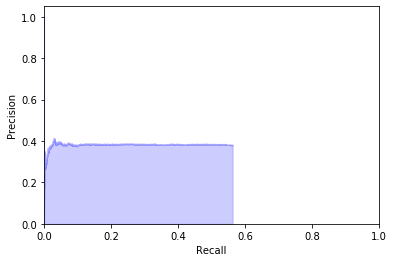

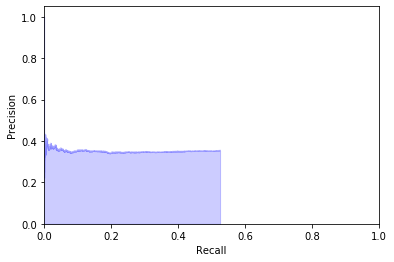

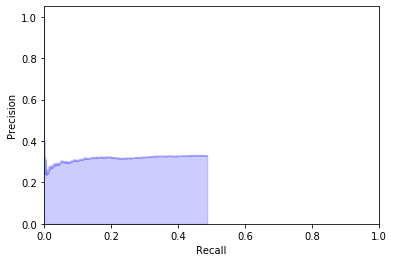

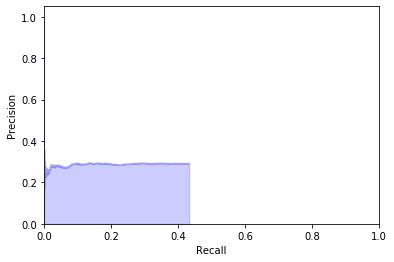

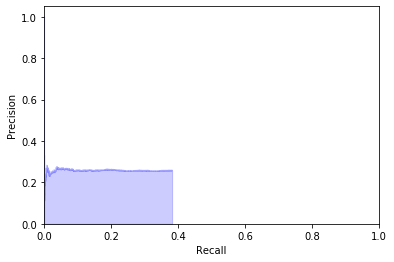

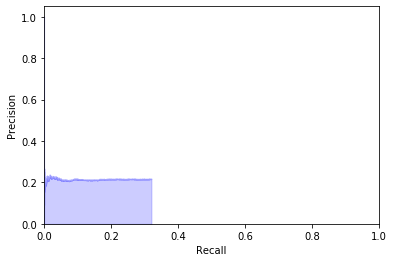

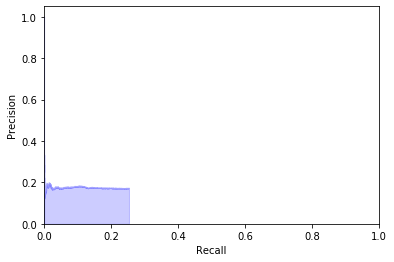

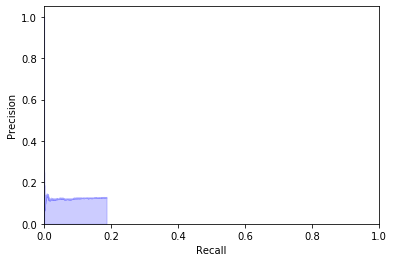

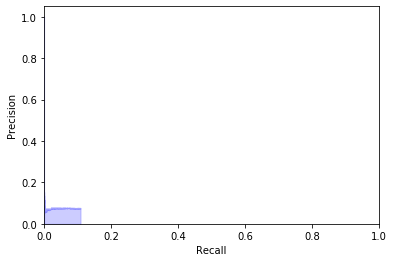

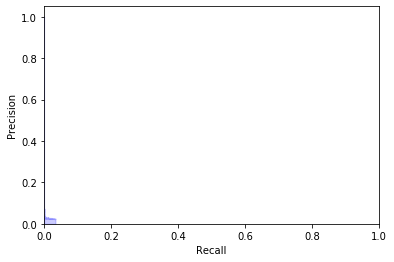

map: 0.09216910615476379


In [0]:
val_preds = []
for img, _, _ in tqdm(dev_loader):
  with torch.no_grad():
      output = model(img.to(device))
  output = output.data.cpu().numpy()
  for out in output:
      coords = extract_coords(out)
      s = coords2str(coords)
      val_preds.append(s)

df_dev['PredictionString'] = val_preds
df_dev.head()
df_dev.to_csv('val_predictions.csv', index=False)

valid_df = pd.read_csv('val_predictions.csv')
expanded_valid_df = expand_df(valid_df, ['pitch','yaw','roll','x','y','z','Score'])
valid_df = valid_df.fillna('')
train_df = pd.read_csv(PATH + 'train.csv')
train_df = train_df[train_df.ImageId.isin(valid_df.ImageId.unique())]
# data description page says, The pose information is formatted as
# model type, yaw, pitch, roll, x, y, z
# but it doesn't, and it should be
# model type, pitch, yaw, roll, x, y, z
expanded_train_df = expand_df(train_df, ['model_type','pitch','yaw','roll','x','y','z'])

max_workers = 10
n_gt = len(expanded_train_df)
ap_list = []
p = Pool(processes=max_workers)
for result_flg, scores in p.imap(check_match, range(10)):
    if np.sum(result_flg) > 0:
        n_tp = np.sum(result_flg)
        recall = n_tp/n_gt
        scores = np.random.rand(len(result_flg))
        ap = average_precision_score(result_flg, scores)*recall
        print_pr_curve(result_flg, scores, recall)
    else:
        ap = 0
    ap_list.append(ap)
map = np.mean(ap_list)
#print('map:', map)
print('map:', map)

In [0]:
valid_df

,ImageId,PredictionString
0,ID_61e1898df,0.1424872 0.46481127512884024 3.10842165549332...
1,ID_63ed0ec41,0.14512104 0.053290550591328506 -3.08897673164...
2,ID_34121bb7d,0.13405403 -0.041147702962140355 -3.0753595997...
3,ID_9bd2e72b9,0.1316137 1.2758658596519878 -3.08244581346447...
4,ID_7739b8ae1,0.14436515 0.010191565392921353 3.127051334949...
...,...,...
420,ID_dc71fa02b,0.15248615 3.128229348601904 3.13076196343685 ...
421,ID_308740c55,0.13717517 0.281772454633112 -3.09118596290285...
422,ID_c6d204ae9,0.15309098 3.035149567208399 -3.10374595050747...
423,ID_c1edc9dea,0.13401431 2.6228211844986125 -3.0909683165424...


In [0]:
threshold0 = 0
sub = df_dev #pred
sub_before = valid #org
numcars = pd.DataFrame({'ImageId': sub['ImageId'].values, 'numcars': [int((str(x).count(' ')+1)/7) for x in sub['PredictionString']]})
numcars_before = pd.DataFrame({'ImageId': sub_before['ImageId'].values, 'numcars': [int((str(x).count(' ')+1)/7) for x in sub_before['PredictionString']]})

def print_numcar_stats(df, prefix):
    print(f"\n{prefix}num cars: {df['numcars'].sum():,d}, \tRatio of num cars to num images: {(df['numcars'].sum()/df.shape[0]):.2f}")
    

prefix = f"AFTER TEST MASKS, threshold = {threshold0}:\n"
print_numcar_stats(numcars, prefix)
prefix = f"BEFORE TEST MASKS, threshold = {threshold0}: \n"
print_numcar_stats(numcars_before, prefix)
#print(f"\nnum cars in train: {train['new_numcars'].sum():,d}, \tratio cars to images in train: {(train['new_numcars'].sum()/train.shape[0]):.2f}")


AFTER TEST MASKS, threshold = 0:
num cars: 7,455, 	Ratio of num cars to num images: 17.54

BEFORE TEST MASKS, threshold = 0: 
num cars: 4,900, 	Ratio of num cars to num images: 11.53


In [0]:
print(model.conv2.ReLU)

In [0]:
history['train_loss'].iloc[100:].plot();

In [0]:
series = history.dropna()['dev_loss']
plt.scatter(series.index, series);

# Visualize predictions

In [0]:
img, mask, regr = dev_dataset[10]

plt.figure(figsize=(16,16))
plt.title('Input image')
plt.imshow(np.rollaxis(img, 0, 3))
plt.show()

plt.figure(figsize=(16,16))
plt.title('Ground truth mask')
plt.imshow(mask)
plt.show()

output = model(torch.tensor(img[None]).to(device))
logits = output[0,0].data.cpu().numpy()

plt.figure(figsize=(16,16))
plt.title('Model predictions')
plt.imshow(logits)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Model predictions thresholded')
plt.imshow(logits > -0)
plt.show()

In [0]:
torch.cuda.empty_cache()
gc.collect()

for idx in range(8):
    img, mask, regr = dev_dataset[idx]
    
    output = model(torch.tensor(img[None]).to(device)).data.cpu().numpy()
    coords_pred = extract_coords(output[0])
    coords_true = extract_coords(np.concatenate([mask[None], regr], 0))
    
    img = imread(train_images_dir.format(df_dev['ImageId'].iloc[idx]))
    
    fig, axes = plt.subplots(1, 2, figsize=(30,30))
    axes[0].set_title('Ground truth')
    axes[0].imshow(visualize(img, coords_true))
    axes[1].set_title('Prediction')
    axes[1].imshow(visualize(img, coords_pred))
    plt.show()

# Make submission

In [0]:
test_dataset = CarDataset(df_test, test_images_dir, training=False,transform=False)

In [0]:
predictions = []

test_loader = DataLoader(dataset=test_dataset, batch_size=4, shuffle=False,num_workers=4)

#model.eval()

for img, _, _ in tqdm(test_loader):
    with torch.no_grad():
        output = model(img.to(device))
    output = output.data.cpu().numpy()
    for out in output:
        coords = extract_coords(out)
        s = coords2str(coords)
        predictions.append(s)

In [0]:
test = pd.read_csv(PATH + 'sample_submission.csv')
test['PredictionString'] = predictions
test.to_csv('predictions.csv', index=False)
test.head()

,ImageId,PredictionString
0,ID_18fb86d04,0.13732097 0.017374943988827277 -3.09170881112...
1,ID_ce06d4dc1,0.13772699 -0.014909497672476294 -3.0704881792...
2,ID_afe07078f,0.1420385 3.109009328773859 -3.105755662667103...
3,ID_37caf75aa,0.13634765 -0.024984067048664602 -3.0718922932...
4,ID_7655363ca,0.1435297 -3.1230981397347732 -3.1178763286494...


In [0]:
!pip install kaggle

In [0]:
!kaggle competitions submit -c pku-autonomous-driving -f predictions.csv -m "Message"

100% 3.71M/3.71M [00:00<00:00, 9.70MB/s]
Successfully submitted to Peking University/Baidu - Autonomous Driving